<a href="https://colab.research.google.com/github/A24bhi/DS-PROJECT3--SVD-NETFLIX/blob/main/SVDNETFLIX_DS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df =pd.read_csv('/content/combinedNetflixData.txt',names=['CustID','Ratings'],usecols=[0,1],header=None)
df

,CustID,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [11]:
df.shape

(24058263, 2)

In [14]:
#Total Movies Count
total_movie_count = df.isnull().sum()['Ratings']

In [16]:
total_movie_count

4499

In [17]:
df['CustID'].unique()

array(['1:', '1488844', '822109', ..., '72311', '4499:', '594210'],
      dtype=object)

In [21]:
customer_count=df['CustID'].nunique()-total_movie_count
customer_count

470758

In [22]:
df_nan=pd.DataFrame(pd.isnull(df['Ratings']))

In [23]:
df_nan

,Ratings
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [24]:
df_nan=df_nan[df_nan['Ratings']==True]
df_nan

,Ratings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [25]:
df.iloc[24057834]

,24057834
CustID,4499:
Ratings,NaN


In [34]:
#How many Ratings we are Dealing
total_ratings=df['Ratings'].count()-total_movie_count
total_ratings

24049265

In [29]:
#Individual Ratings
df['Ratings'].value_counts()

,count
Ratings,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


In [31]:
stars=df.groupby('Ratings')['Ratings'].agg(['count'])
stars

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


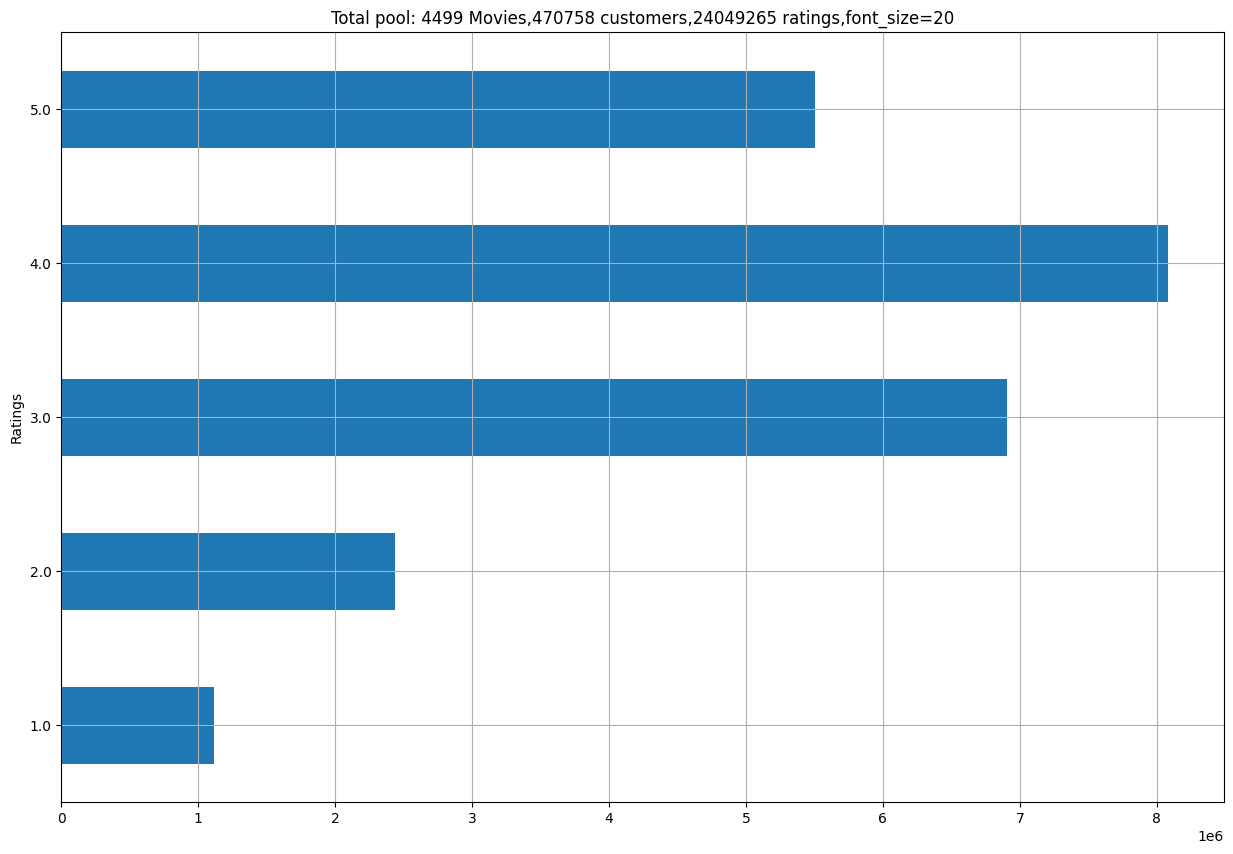

In [35]:
ax=stars.plot(kind='barh',legend=False,figsize=(15,10))
plt.title(f'Total pool: {total_movie_count} Movies,{customer_count} customers,{total_ratings} ratings,font_size=20')
plt.grid(True)

In [37]:
#Segregation of the Data
current_movie_id=None
movie_id=[]

for cust_id in df ['CustID']:
  if ':' in cust_id:
    current_movie_id=int(cust_id.replace(':',''))
  movie_id.append(current_movie_id)

In [39]:
len(movie_id)

24058263

In [40]:
movie_id[-1]

4499

In [41]:
temp=df.copy()

In [42]:
temp['Movie_Id']=movie_id

In [44]:
temp=temp[temp['Ratings'].notna()]

In [45]:
temp

,CustID,Ratings,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [46]:
df=temp.copy()

In [49]:
#Preparation from Collabrative Filtering - Removing the Least Rated Movies
movie_list = df.groupby('Movie_Id')['Ratings'].agg(['count'])
movie_list

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [50]:
movie_list['count'].quantile(0.7)

1798.6

In [51]:
benchmark_movies=round(movie_list['count'].quantile(0.7),0)
benchmark_movies

1799.0

In [53]:
#This Line represents Index of the movies which are lesser value then the Benchmarkmovies
drop_list_movies = movie_list[movie_list['count']<benchmark_movies].index

In [54]:
drop_list_movies

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [55]:
#Removing the Non-Active User
cust_list=df.groupby('CustID')['Ratings'].agg(['count'])
cust_list

,count
CustID,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [56]:
benchmark_customer = round(cust_list['count'].quantile(0.7),0)
benchmark_customer

52.0

In [58]:
#Drop List for customer to remove the least active customer
drop_list_cust = cust_list[cust_list['count']<benchmark_customer].index
drop_list_cust

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='CustID', length=327300)

In [59]:
#Now Removing Both things from Original Data
df.columns

Index(['CustID', 'Ratings', 'Movie_Id'], dtype='object')

In [60]:
df['CustID'].unique()

array(['1488844', '822109', '885013', ..., '1017887', '72311', '594210'],
      dtype=object)

In [63]:
# here just not including tht movie_id in the drop_list_movies
df=df[~df['Movie_Id'].isin(drop_list_movies)]

In [64]:
df.shape

(22629885, 3)

In [66]:
df=df[~df['CustID'].isin(drop_list_cust)]

In [67]:
df.shape

(17337458, 3)

In [72]:
# Now second Data comes
movie_df=pd.read_csv('/content/NetflixMovieData.csv',names=['Movie_Id','Year','Name'],usecols=[0,1,2],header=None)
movie_df

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [73]:
movie_df=movie_df.set_index('Movie_Id')
movie_df

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [74]:
#Recommendation System development using SVD

In [76]:
!pip install scikit.surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit.surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357285 sha256=296a0348bc05894b0a7a2c3171aeefa0c90d157cbf6be0211813278c5e5b779a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit.surprise


In [77]:
from surprise import Reader, Dataset,SVD
from surprise.model_selection import cross_validate

In [79]:
reader=Reader()

In [81]:
#we need Data to work on, we are considering the first 1 lakh in order to keep the model simple
data = Dataset.load_from_df(df[['CustID','Movie_Id','Ratings']][:100000],reader)

In [83]:
data

In [84]:
#Model Building
model=SVD()

In [85]:
# Here I use Cross_validate for better Recommendation and to ensure least errors
cross_validate(model,data,measures=['RMSE'],cv=4)

{'test_rmse': array([0.99876914, 0.98913727, 0.99692908, 0.99827711]),
 'fit_time': (2.0188522338867188,
  1.6547865867614746,
  1.705824375152588,
  1.6318094730377197),
 'test_time': (0.15085816383361816,
  0.17138409614562988,
  0.4449131488800049,
  0.1254875659942627)}

In [86]:
data_712644=df[(df['CustID']=='712664') & (df['Ratings']==5.0)]
data_712644

,CustID,Ratings,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [88]:
movie_df

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [89]:
list_of_infinite_possibility=movie_df.copy()

In [90]:
list_of_infinite_possibility.reset_index(inplace=True)

In [91]:
list_of_infinite_possibility=list_of_infinite_possibility[~list_of_infinite_possibility['Movie_Id'].isin(drop_list_movies)]

In [92]:
list_of_infinite_possibility

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [93]:
list_of_infinite_possibility['Estimate Score'] = list_of_infinite_possibility['Movie_Id'].apply(lambda x:model.predict('712664',x).est)
list_of_infinite_possibility

,Movie_Id,Year,Name,Estimate Score
2,3,1997.0,Character,4.268341
7,8,2004.0,What the #$*! Do We Know!?,3.602298
15,16,1996.0,Screamers,3.486864
16,17,2005.0,7 Seconds,3.168757
17,18,1994.0,Immortal Beloved,3.933047
...,...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.715549
17765,17767,2004.0,Fidel Castro: American Experience,3.715549
17766,17768,2000.0,Epoch,3.715549
17767,17769,2003.0,The Company,3.715549


In [ ]:
     # END #